In [8]:
import sys
print(sys.executable)

C:\Users\PC\anaconda3\python.exe


In [9]:
!pip show mlflow


Name: mlflow
Version: 2.14.2
Summary: MLflow is an open source platform for the complete machine learning lifecycle
Home-page: 
Author: 
Author-email: 
License: Copyright 2018 Databricks, Inc.  All rights reserved.

                                Apache License
                           Version 2.0, January 2004
                        http://www.apache.org/licenses/

   TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

   1. Definitions.

      "License" shall mean the terms and conditions for use, reproduction,
      and distribution as defined by Sections 1 through 9 of this document.

      "Licensor" shall mean the copyright owner or entity authorized by
      the copyright owner that is granting the License.

      "Legal Entity" shall mean the union of the acting entity and all
      other entities that control, are controlled by, or are under common
      control with that entity. For the purposes of this definition,
      "control" means (i) the power, direct or 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow

In [33]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("Exp_1")

<Experiment: artifact_location='file:///C:/Users/PC/ML_practice/Projects_Resume/mlruns/1', creation_time=1720585826040, experiment_id='1', last_update_time=1720585826040, lifecycle_stage='active', name='Exp_1', tags={}>

In [17]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [3]:
df['Usage Frequency'].max()

30.0

<Axes: xlabel='Usage Frequency', ylabel='Count'>

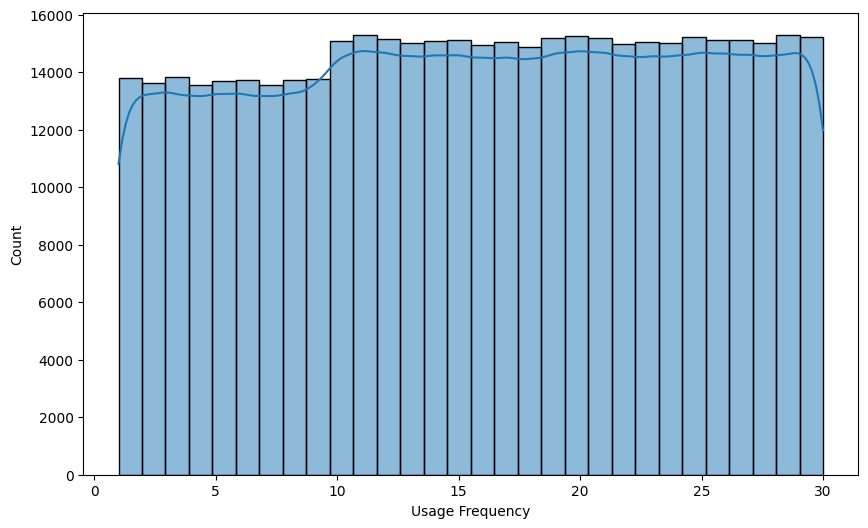

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Usage Frequency'], bins=30, kde=True)

In [5]:
df_clean = df[df['Age'] <= 20000]
df_clean

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [4]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [18]:
df = df.dropna()
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [8]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


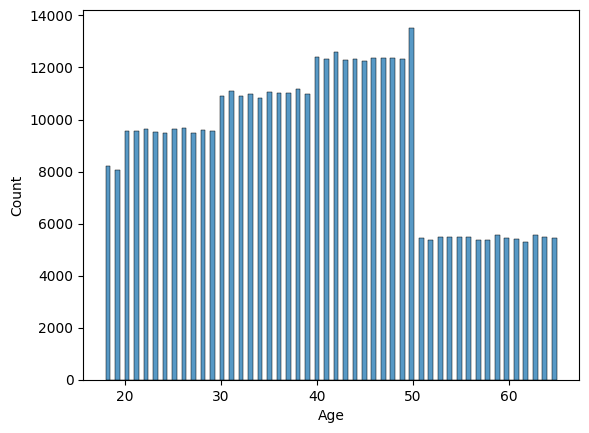

In [9]:
sns.histplot(df['Age'])
plt.show()

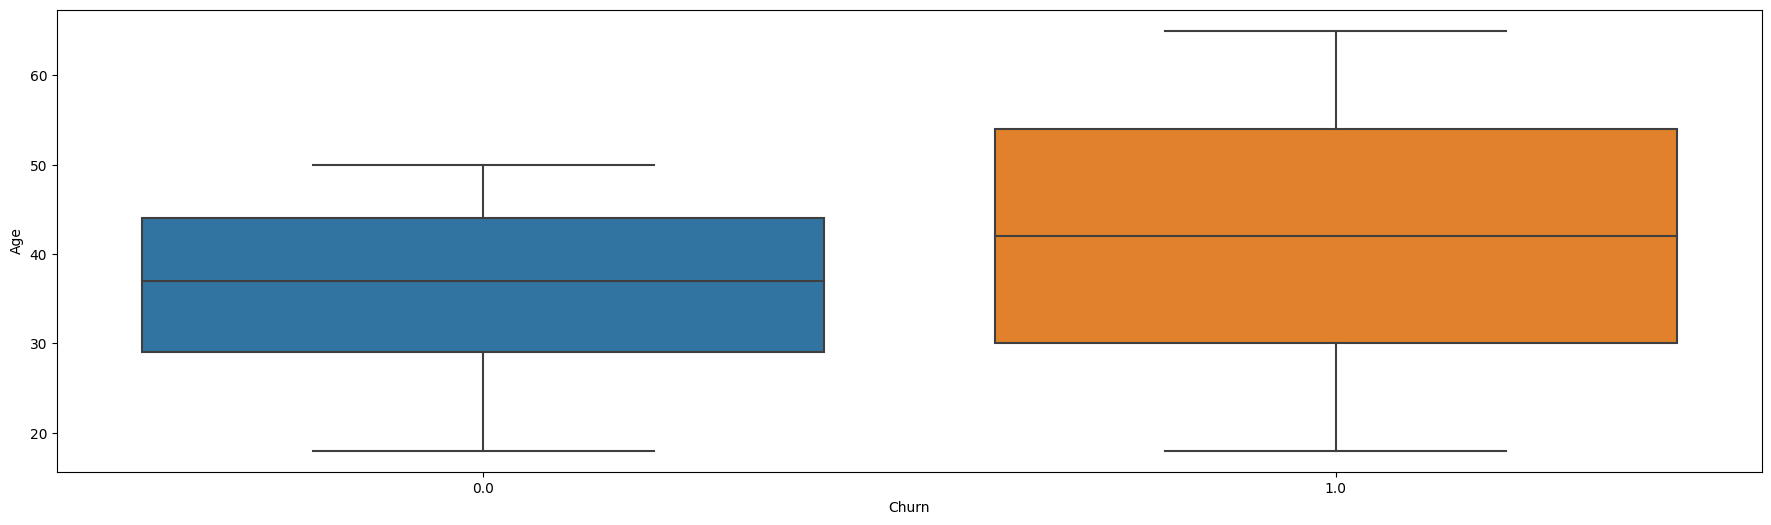

In [10]:
plt.figure(figsize=(22, 6))
sns.boxplot(x = 'Churn', y = 'Age', data=df)
plt.show()

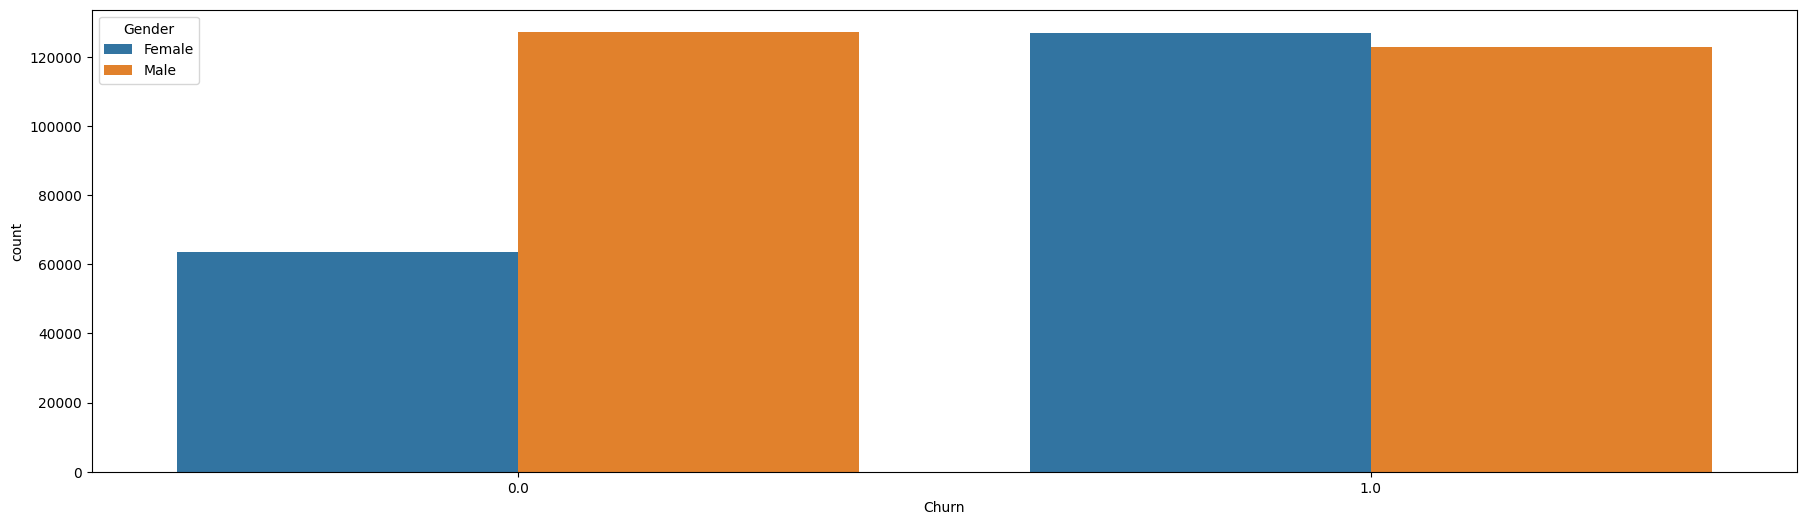

In [11]:
plt.figure(figsize=(22,6))
sns.countplot(x = 'Churn', hue = 'Gender', data=df)
plt.show()

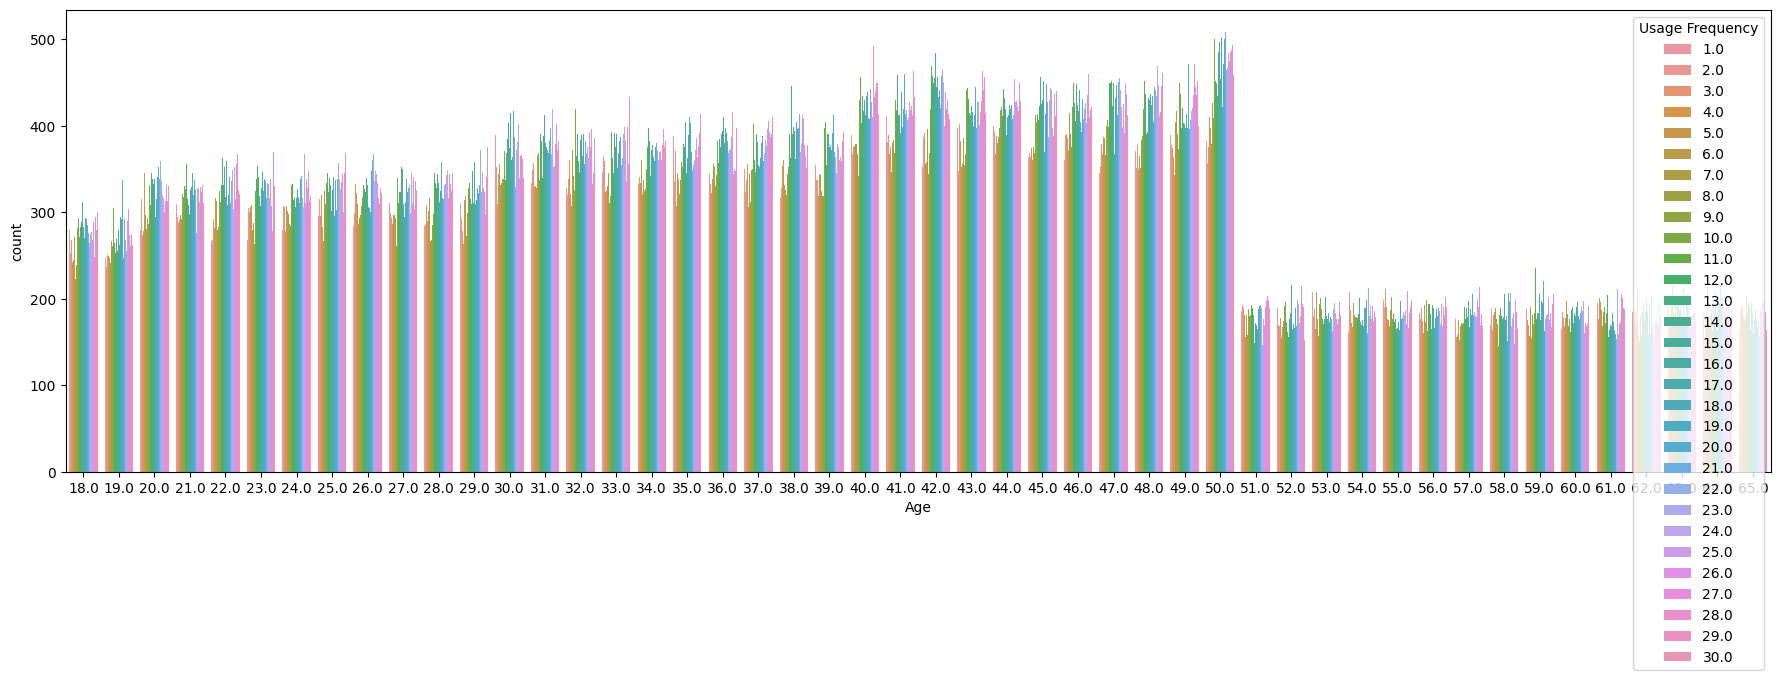

In [12]:
plt.figure(figsize=(22,6))
sns.countplot(x = 'Age', hue = 'Usage Frequency', data=df)
plt.show()

<Axes: xlabel='Age', ylabel='Usage Frequency'>

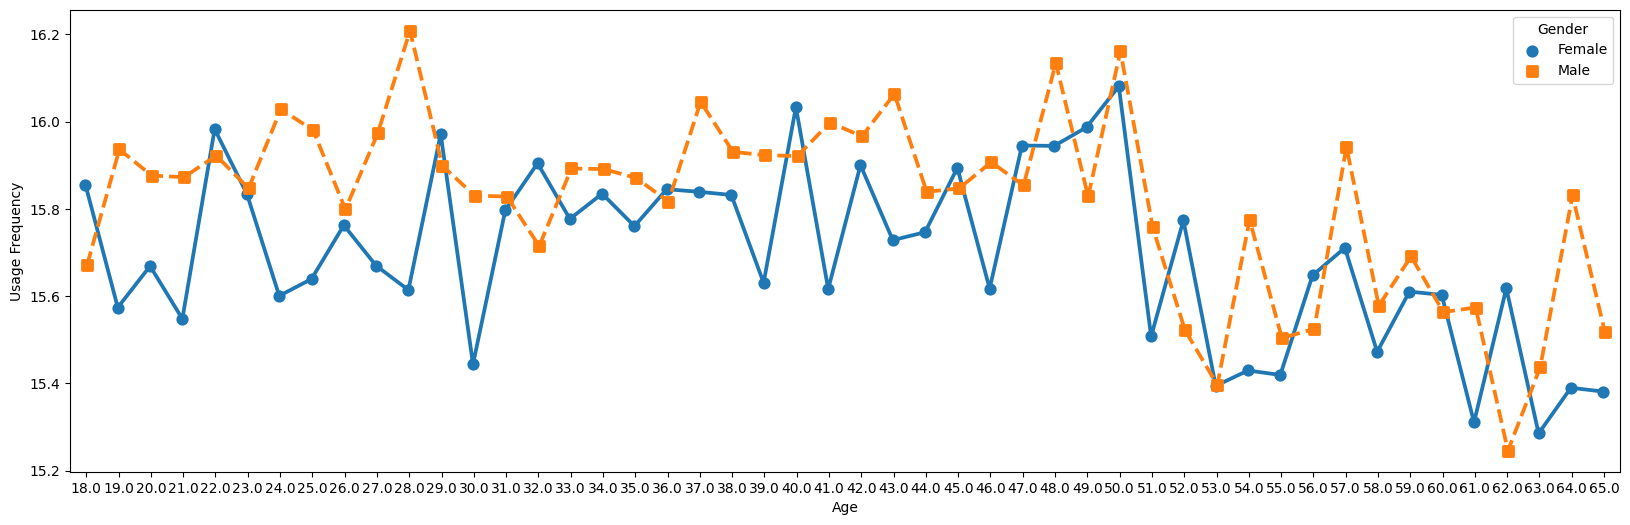

In [13]:
plt.figure(figsize=(20, 6))
sns.pointplot(x='Age', y='Usage Frequency', hue='Gender', data=df, dodge=True, markers=['o', 's'], linestyles=['-', '--'], errorbar=None)


In [22]:
categorical_features = df.select_dtypes('object').columns.tolist()
categorical_features

['Gender', 'SubscriptionType', 'ContractLength']

In [23]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype='int')
df

,CustomerID,Age,Tenure,UsageFrequency,SupportCalls,PaymentDelay,TotalSpend,LastInteraction,Churn,Gender_Male,SubscriptionType_Premium,SubscriptionType_Standard,ContractLength_Monthly,ContractLength_Quarterly
0,-1.740088,-0.753326,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0,0,1,0,0
1,-1.740080,2.059646,49.0,1.0,10.0,8.0,557.00,6.0,1.0,0,0,0,1,0
2,-1.740072,1.255940,14.0,4.0,6.0,18.0,185.00,3.0,1.0,0,0,0,0,1
3,-1.740065,1.497051,38.0,21.0,7.0,7.0,396.00,29.0,1.0,1,0,1,1,0
4,-1.740057,-1.315921,32.0,20.0,5.0,8.0,617.00,20.0,1.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,1.733909,0.211121,54.0,15.0,1.0,3.0,716.38,8.0,0.0,1,1,0,0,0
440829,1.733917,-1.155179,8.0,13.0,1.0,20.0,745.38,2.0,0.0,0,1,0,0,0
440830,1.733925,-1.074809,35.0,27.0,1.0,5.0,977.31,9.0,0.0,1,0,1,0,1
440831,1.733932,-0.914068,55.0,14.0,2.0,0.0,602.55,2.0,0.0,1,0,1,0,1


In [24]:
df.columns = df.columns.str.replace(' ', '')
df

,CustomerID,Age,Tenure,UsageFrequency,SupportCalls,PaymentDelay,TotalSpend,LastInteraction,Churn,Gender_Male,SubscriptionType_Premium,SubscriptionType_Standard,ContractLength_Monthly,ContractLength_Quarterly
0,-1.740088,-0.753326,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0,0,1,0,0
1,-1.740080,2.059646,49.0,1.0,10.0,8.0,557.00,6.0,1.0,0,0,0,1,0
2,-1.740072,1.255940,14.0,4.0,6.0,18.0,185.00,3.0,1.0,0,0,0,0,1
3,-1.740065,1.497051,38.0,21.0,7.0,7.0,396.00,29.0,1.0,1,0,1,1,0
4,-1.740057,-1.315921,32.0,20.0,5.0,8.0,617.00,20.0,1.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,1.733909,0.211121,54.0,15.0,1.0,3.0,716.38,8.0,0.0,1,1,0,0,0
440829,1.733917,-1.155179,8.0,13.0,1.0,20.0,745.38,2.0,0.0,0,1,0,0,0
440830,1.733925,-1.074809,35.0,27.0,1.0,5.0,977.31,9.0,0.0,1,0,1,0,1
440831,1.733932,-0.914068,55.0,14.0,2.0,0.0,602.55,2.0,0.0,1,0,1,0,1


In [31]:
df.head()

,Age,Tenure,UsageFrequency,SupportCalls,PaymentDelay,TotalSpend,LastInteraction,Gender_Male,SubscriptionType_Premium,SubscriptionType_Standard,ContractLength_Monthly,ContractLength_Quarterly
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,0,0,1,0,0
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,0,0,0,1,0
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,0,0,0,0,1
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1,0,1,1,0
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1,0,0,1,0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

In [25]:
numerical_features = list(df.iloc[:,:-6])

scaler = StandardScaler()


for feature in numerical_features:
    df.loc[:,feature] = scaler.fit_transform(df[[feature]])
df

,CustomerID,Age,Tenure,UsageFrequency,SupportCalls,PaymentDelay,TotalSpend,LastInteraction,Churn,Gender_Male,SubscriptionType_Premium,SubscriptionType_Standard,ContractLength_Monthly,ContractLength_Quarterly
0,-1.740088,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,1.0,0,0,1,0,0
1,-1.740080,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,1.0,0,0,0,1,0
2,-1.740072,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,1.0,0,0,0,0,1
3,-1.740065,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1.0,1,0,1,1,0
4,-1.740057,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,1.733909,0.211121,1.318037,-0.094045,-0.848291,-1.206788,0.352005,-0.753923,0.0,1,1,0,0,0
440829,1.733917,-1.155179,-1.347747,-0.326976,-0.848291,0.851808,0.472436,-1.451906,0.0,0,1,0,0,0
440830,1.733925,-1.074809,0.216952,1.303541,-0.848291,-0.964600,1.435589,-0.637592,0.0,1,0,1,0,1
440831,1.733932,-0.914068,1.375989,-0.210511,-0.522581,-1.570070,-0.120706,-1.451906,0.0,1,0,1,0,1


In [26]:
df = df.drop(['CustomerID'],axis=1)
df

,Age,Tenure,UsageFrequency,SupportCalls,PaymentDelay,TotalSpend,LastInteraction,Churn,Gender_Male,SubscriptionType_Premium,SubscriptionType_Standard,ContractLength_Monthly,ContractLength_Quarterly
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,1.0,0,0,1,0,0
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,1.0,0,0,0,1,0
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,1.0,0,0,0,0,1
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1.0,1,0,1,1,0
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,0.211121,1.318037,-0.094045,-0.848291,-1.206788,0.352005,-0.753923,0.0,1,1,0,0,0
440829,-1.155179,-1.347747,-0.326976,-0.848291,0.851808,0.472436,-1.451906,0.0,0,1,0,0,0
440830,-1.074809,0.216952,1.303541,-0.848291,-0.964600,1.435589,-0.637592,0.0,1,0,1,0,1
440831,-0.914068,1.375989,-0.210511,-0.522581,-1.570070,-0.120706,-1.451906,0.0,1,0,1,0,1


In [27]:
df.head()

,Age,Tenure,UsageFrequency,SupportCalls,PaymentDelay,TotalSpend,LastInteraction,Churn,Gender_Male,SubscriptionType_Premium,SubscriptionType_Standard,ContractLength_Monthly,ContractLength_Quarterly
0,-0.753326,0.448760,-0.210511,0.454549,0.609620,1.247427,0.293052,1.0,0,0,1,0,0
1,2.059646,1.028278,-1.724562,2.083100,-0.601319,-0.309865,-0.986584,1.0,0,0,0,1,0
2,1.255940,-1.000036,-1.375166,0.780259,0.609620,-1.854698,-1.335575,1.0,0,0,0,0,1
3,1.497051,0.390808,0.604748,1.105969,-0.722413,-0.978462,1.689018,1.0,1,0,1,1,0
4,-1.315921,0.043097,0.488282,0.454549,-0.601319,-0.060698,0.642043,1.0,1,0,0,1,0


In [28]:
X = df.drop(['Churn'],axis= 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [60]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")


Training dataset shape, X_train: (308582, 12), y_train: (308582,)


In [61]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")


Testing dataset shape, X_test: (132250, 12), y_test: (132250,)


In [32]:
lr = LogisticRegression(random_state=42)
mlflow.log_param("lr", lr)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mlflow.sklearn.log_model(lr,'model')

C:\Users\PC\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [63]:
def results(y_pred):
    """
    Input:
        - y_pred: 1D-array containing predictions 
    Output:
        - results: dictionnary containing the metrics from predictions
        
    Returns metrics (accuracy, precision, recall, f1 and roc auc scores) from predictions
    """
    results = {}
    
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1_score'] = f1_score(y_test, y_pred)
    results['roc_auc_score'] = roc_auc_score(y_test, y_pred)
    
    return results

In [64]:
results(y_pred)

{'accuracy': 0.8958034026465028,
 'precision': 0.9267596614322308,
 'recall': 0.8865494739645758,
 'f1_score': 0.9062087366085406,
 'roc_auc_score': 0.8972547929654929}